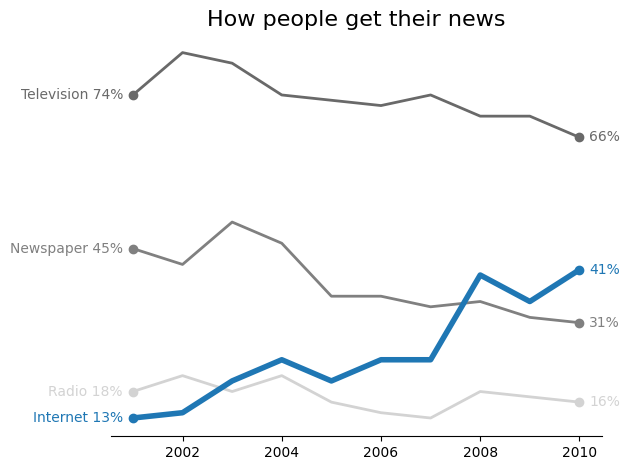

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.Figure()
colors = {
    'Television': 'dimgray',
    'Newspaper': 'grey',
    'Internet': 'tab:blue', #paleta de colores de tableau
    'Radio': 'lightgrey'
}

zorder = {
    'Television': 1,
    'Newspaper': 1,
    'Internet': 2,
    'Radio': 1
}

linewidths = {
    'Television': 2,
    'Newspaper': 2,
    'Internet': 4,
    'Radio': 2,
}


df = pd.read_csv("../files/input/news.csv", index_col=0)
for col in df.columns:
    plt.plot(
        df[col], 
        color=colors[col],
        label=col,
        zorder=zorder[col],
        linewidth =linewidths[col],
    )


plt.title("How people get their news", fontsize =16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

for col in df.columns:
    first_year = df.index[0]
    plt.scatter(
        x=first_year,
        y=df[col][first_year],
        color=colors[col],
        zorder=zorder[col],
    )

    plt.text(
        first_year - 0.2,
        df[col][first_year],
        col + " " + str(df[col][first_year]) + "%",
        ha='right',
        va='center',
        color=colors[col],
    )

    last_year = df.index[-1]
    plt.scatter(
        x=last_year,
        y=df[col][last_year],
        color=colors[col],
        zorder=zorder[col],
    )  

    plt.text(
        last_year + 0.2,
        df[col][last_year],
        str(df[col][last_year]) + "%",
        ha='left',
        va='center',
        color=colors[col],  
    )
  
plt.tight_layout()

output_path = "../files/plots"
os.makedirs(output_path, exist_ok=True)


plt.savefig(os.path.join(output_path, "news.png"))

plt.show()